## Confusion Matrix

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('../Datasets/Iris/Iris.csv')

dataset

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [2]:
# Separando o dataset por classe
X = np.array(dataset.iloc[:, 1:-1])
y = np.array(dataset.iloc[:, -1])

X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [3]:
# Convertendo y para numérico
y = np.where(y == 'Iris-setosa', 0, y)
y = np.where(y == 'Iris-versicolor', 1, y)
y = np.where(y == 'Iris-virginica', 2, y)

y = y.astype(int)

print(X.shape, y.shape)

(150, 4) (150,)


In [4]:
from sklearn.model_selection import StratifiedKFold

# Adicionar uma coluna de 1s para considerar o termo de bias (intercept) no modelo linear
X_proc = np.column_stack((X, np.ones(X.shape[0])))
y_proc = y

# Separando dados em X folders
skf = StratifiedKFold(n_splits=5, shuffle=True)

In [5]:
def one_hot_convert(vec):
    matrix = []
    for idx in vec:
      m = np.zeros((3, 1))
      m[idx] = 1
      matrix.append(m)
    return np.array(matrix)

# Funções de ativação para o neurônio
def activate_functions(type, matrix):
    if type == 'sigmoid':
        return 1 / (1 + np.exp(-matrix))
    elif type == 'softmax':
        exp_matrix = np.exp(matrix - np.max(matrix, axis=1, keepdims=True))
        return exp_matrix / np.sum(exp_matrix, axis=1, keepdims=True)   
    elif type == 'tanh':
        return np.tanh(matrix)

# Função de treino do MLP
def mlp_train(X, y, n_neurons_hlayer, epochs, l_rate, criteria):
    # Colocar y em formato de vetor (one hot)
    y = one_hot_convert(y).reshape(y.shape[0], -1)
    
    n_classes = y.shape[1]
    n_features = X.shape[1]

    w_input = np.random.randn(n_features, n_neurons_hlayer) * 0.1
    w_output = np.random.randn(n_neurons_hlayer, n_classes) * 0.1

    bias_input = np.random.randn(n_neurons_hlayer, 1) * 0.5
    bias_output = np.random.randn(n_classes, 1) * 0.5

    loss_history = []
    for epoch in range(epochs):
        
        # Forward
        Zin = (X @ w_input) + bias_input.T
        result_in = activate_functions('sigmoid', Zin)

        Zout = (result_in @ w_output) + bias_output.T
        result_out = activate_functions('softmax', Zout)

        # Backpropagation
        error_out = result_out - y
        grad_out = error_out / len(X)

        error_in = grad_out @ w_output.T
        grad_in = error_in * result_in * (1 - result_in)

        # Ajustar os pesos e os viéses
        w_input -= l_rate * np.dot(X.T, grad_in)
        w_output -= l_rate * np.dot(result_in.T, grad_out)

        bias_input -= l_rate * np.sum(grad_in, axis=0, keepdims=True).T
        bias_output -= l_rate * np.sum(grad_out, axis=0, keepdims=True).T

        if epoch == 0:
            loss = np.mean((y - result_out)**2)
            print('    Initial Epoch: {}, loss: {}'.format(epoch, loss))
            best_loss = loss
            loss_history.append(loss)
            
        if epoch != 0 and epoch % 500 == 0:
            loss = np.mean((y - result_out)**2)
            print('    Epoch: {}, loss: {}'.format(epoch, loss))
            loss_history.append(loss)

            if loss < best_loss:
                best_loss = loss
                wait = 0
            else: wait += 1

            if wait >= criteria:
                print('    Final Epoch (loss stopped): {}, loss: {}'.format(epoch, loss))
                return loss_history, w_input, w_output, bias_input, bias_output

    loss = np.mean((y - result_out)**2)
    print('    Last Epoch: {}, loss: {}'.format(epoch+1, loss))
                                      
    return loss_history, w_input, w_output, bias_input, bias_output

In [6]:
# Função de predição do MLP
def mlp_predict(X, w_in, w_out, bias_in, bias_out):
    # Forward
    Zin = (X @ w_in) + bias_in.T
    result_in = activate_functions('sigmoid', Zin)

    Zout = (result_in @ w_out) + bias_out.T
    result_out = activate_functions('softmax', Zout)

    # Converte as saídas para as classes preditas (0 a 9) usando a função argmax
    # A classe predita será o índice do valor máximo em cada linha
    classe = np.argmax(result_out, axis=1)

    return classe

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmx = np.zeros((3,3))

# Iterando entre folders
for i, (train_index, test_index) in enumerate(skf.split(X_proc, y_proc)):
    print('Folder {}/{}'.format(i+1, skf.get_n_splits(X, y)))
    
    X_train_fold, X_test_fold = X_proc[train_index], X_proc[test_index]
    y_train_fold, y_test_fold = y_proc[train_index], y_proc[test_index]

    # Realizar o treinamento
    loss_history, w_input, w_output, bias_input, bias_output = mlp_train(X_train_fold, 
                                                                         y_train_fold, 
                                                                         n_neurons_hlayer=45, 
                                                                         epochs=5000, 
                                                                         l_rate=0.1, 
                                                                         criteria=15)
    # Realizar a predição no conjunto de teste
    y_pred_test = mlp_predict(X_test_fold, w_input, w_output, bias_input, bias_output)
    
    # Matriz de confusão
    cmx += confusion_matrix(y_test_fold, y_pred_test)

Folder 1/5
    Initial Epoch: 0, loss: 0.2587775837415962
    Epoch: 500, loss: 0.028267335498337567
    Epoch: 1000, loss: 0.014774881603294817
    Epoch: 1500, loss: 0.01247802626066702
    Epoch: 2000, loss: 0.011637452929344424
    Epoch: 2500, loss: 0.011205578605165783
    Epoch: 3000, loss: 0.010941407587459222
    Epoch: 3500, loss: 0.010761967064197051
    Epoch: 4000, loss: 0.010631104270227947
    Epoch: 4500, loss: 0.010530550336573685
    Last Epoch: 5000, loss: 0.010450261112586913
Folder 2/5
    Initial Epoch: 0, loss: 0.23078406066011017
    Epoch: 500, loss: 0.028046285594247503
    Epoch: 1000, loss: 0.015050523173887342
    Epoch: 1500, loss: 0.012401215328235664
    Epoch: 2000, loss: 0.011241812906200802
    Epoch: 2500, loss: 0.010531541658647106
    Epoch: 3000, loss: 0.010021883444952098
    Epoch: 3500, loss: 0.009623368823452145
    Epoch: 4000, loss: 0.009294425176545856
    Epoch: 4500, loss: 0.00901235250653512
    Last Epoch: 5000, loss: 0.0087639004343227

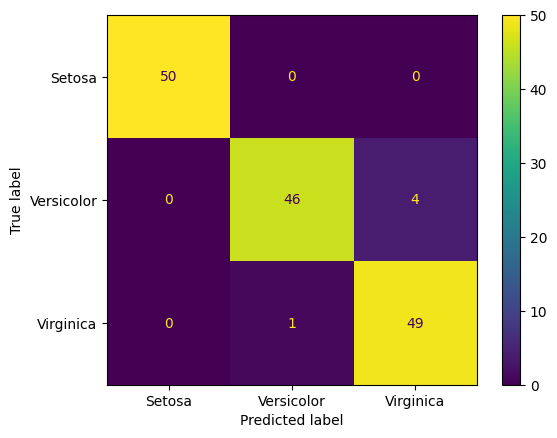

In [13]:
import matplotlib.pyplot as plt

labels = ['Setosa', 'Versicolor', 'Virginica']
cm_display = ConfusionMatrixDisplay(confusion_matrix = cmx, display_labels = labels)

cm_display.plot()
plt.show()